In [2]:
import qiskit
import numpy as np
from scipy.linalg import expm

In [2]:
from qiskit import QuantumCircuit

def initCircuit(n):
    circuit = QuantumCircuit(2 * n)
    senders = circuit.qubits[0:n]
    receivers = circuit.qubits[n:]
    
    for sender, receiver in zip(senders, receivers):
        circuit.h(sender)
        circuit.cx(sender, receiver)
        
    return senders, receivers, circuit

#### Test 1: Init circuit

Qubits:
 [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2), Qubit(QuantumRegister(4, 'q'), 3)]
Senders'register:
 [Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1)]
Receivers'register:
 [Qubit(QuantumRegister(4, 'q'), 2), Qubit(QuantumRegister(4, 'q'), 3)]


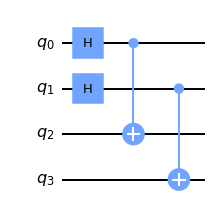

In [3]:
senders_test, receivers_test, circuit_test = initCircuit(2)
print("Qubits:\n",circuit_test.qubits)
print("Senders'register:\n",senders_test)
print("Receivers'register:\n",receivers_test)
circuit_test.draw('mpl')

In [4]:
circuits_bits = dict()

#Operations
def operate(circuit, target, bits):
    """
        => Z^(b_1) * X^(b_2)
    """
    if bits[0] == '1':
        circuit.z(target)
    if bits[1] == '1':
        circuit.x(target)

    return circuit

# Generate the Circuit
def getCircuit(classical_bits):
    bits_str = ''.join(classical_bits)
    if bits_str in circuits_bits:
        return circuits_bits[bits_str].copy()
    
    """
        getCircuit(circuit, ["01", "10", "00"])
            => X(A1), Z(A2), I(A3)
    """
    # global circuit
    circuit_copy = circuit.copy()
    
    circuit_copy.barrier(senders)
    for i, sender in enumerate(senders):
        operate(circuit_copy, sender, classical_bits[i])
    
    # memoized
    circuits_bits[bits_str] = circuit_copy

    return circuit_copy

#### Test 2: Get circuit

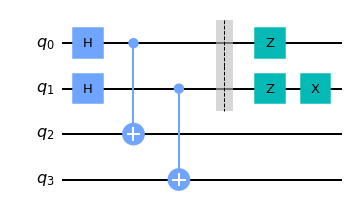

In [5]:
senders, receivers, circuit = initCircuit(2)
circuit_1011 = getCircuit(['10', '11'])
circuit_1011.draw('mpl')

In [3]:
#def generateCombs(n, combs, comb):
def generateCombs(n, combs, comb):   
    """
        n = 3 => 000 ... 888
    """
    if len(comb) == n:
        combs.append(comb)
        
        return

    for i in range(n**2):
        generateCombs(n, combs, comb + str(i))

In [4]:
combs = []
generateCombs(3, combs, '')

print(combs)

['000', '001', '002', '003', '004', '005', '006', '007', '008', '010', '011', '012', '013', '014', '015', '016', '017', '018', '020', '021', '022', '023', '024', '025', '026', '027', '028', '030', '031', '032', '033', '034', '035', '036', '037', '038', '040', '041', '042', '043', '044', '045', '046', '047', '048', '050', '051', '052', '053', '054', '055', '056', '057', '058', '060', '061', '062', '063', '064', '065', '066', '067', '068', '070', '071', '072', '073', '074', '075', '076', '077', '078', '080', '081', '082', '083', '084', '085', '086', '087', '088', '100', '101', '102', '103', '104', '105', '106', '107', '108', '110', '111', '112', '113', '114', '115', '116', '117', '118', '120', '121', '122', '123', '124', '125', '126', '127', '128', '130', '131', '132', '133', '134', '135', '136', '137', '138', '140', '141', '142', '143', '144', '145', '146', '147', '148', '150', '151', '152', '153', '154', '155', '156', '157', '158', '160', '161', '162', '163', '164', '165', '166', '167'

In [5]:
lambdaMatrices = dict()
lambdaMatrices['0'] = np.eye(3)
lambdaMatrices['1'] = np.array([[0.,1.,0.],[1.,0.,0.],[0.,0.,0.]])
lambdaMatrices['2'] = np.array([[0.,-1.j,0.],[1.j,0.,0.],[0.,0.,0.]])
lambdaMatrices['3'] = np.array([[1.,0.,0.],[0.,-1.,0.],[0.,0.,0.]])
lambdaMatrices['4'] = np.array([[0.,0.,1.],[0.,0.,0.],[1.,0.,0.]])
lambdaMatrices['5'] = np.array([[0.,0.,-1.j],[0.,0.,0.],[1.j,0.,0.]])
lambdaMatrices['6'] = np.array([[0.,0.,0.],[0.,0.,1.],[0.,1.,0.]])
lambdaMatrices['7'] = np.array([[0.,0.,0.],[0.,0.,-1.j],[0.,1.j,0.]])
lambdaMatrices['8'] =(1/np.sqrt(3)) * np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,-2.]])

In [9]:

#from collections import defaultdict

#from qiskit.quantum_info.operators import Operator, Pauli
#from qiskit.extensions import HamiltonianGate



matrixes = [
    lambdaMatrices['0'],
    lambdaMatrices['1'],
    lambdaMatrices['2'],
    lambdaMatrices['3'],
    lambdaMatrices['4'],
    lambdaMatrices['5'],
    lambdaMatrices['6'],
    lambdaMatrices['7'],
    lambdaMatrices['8']
]

#Hermitians = defaultdict(list)
Hermitians = []
def buildU(n, p):
    H = np.zeros((3 ** n, 3 ** n)).astype('complex64')
    
    for comb in combs:
        temp = np.kron(matrixes[int(comb[0])], matrixes[int(comb[1])])
        
        for i in range(2, n):
            temp = np.kron(temp, matrixes[int(comb[i])])                
         
        Hermitians.append(temp)
    for para, hermitian in zip(p, Hermitians):
        H += para * hermitian
    #U = HamiltonianGate(H, 1.2)   
    #U = np.exp(1.j * H)
    #矩阵指数计算
    U = expm(1.j * H)


    return U


#### Test 3: build unitary U

In [ ]:
'''
#def buildU(n, p, time):
def buildU(n, p):
    H = np.zeros((3 ** n, 3 ** n)).astype('complex64')
    
    # global Hermitians
    if n in Hermitians:
        # global combs
        for comb in combs:
            temp = np.kron(matrixes[int(comb[0])], matrixes[int(comb[1])])
            
            for i in range(2, n):
                temp = np.kron(temp, matrixes[int(comb[i])])
                
            Hermitians[n].append(temp)
            
    for para, hermitian in zip(p, Hermitians[n]):
        H += para * hermitian
        #H += para * Hermitians[n]
    # time: simulation time
    # return type => DensityMatrix (qiskit)
      #U = HamiltonianGate(H, time)
    U = np.exp(-1.j * H)
    
    return H
'''

In [14]:
n = 2
#U1 = buildU(n, np.random.uniform(-1, 1, 2 ** (2*n)), time=1.2)
U1 = buildU(n, np.random.uniform(-1, 1, 3 ** (2*n)))
U2 = np.conj(U1).T # U-dagger
print('U1 @ U2:\n', U1 @ U2)
I = np.eye(3 ** n)
print('I:\n',I)
# U * U_dagger = I => unitary
# expected: true
np.allclose(U1 @ U2, I, atol=1e-04)

U1 @ U2:
 [[ 9.9999994e-01+0.0000000e+00j  1.6391277e-07+2.9802322e-08j
  -2.2351742e-08-2.9802322e-08j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j]
 [ 1.6391277e-07-2.9802322e-08j  9.9999994e-01+0.0000000e+00j
  -1.4156103e-07+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j]
 [-2.2351742e-08+2.9802322e-08j -1.4156103e-07+0.0000000e+00j
   1.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j  1.0000002e+00+0.0000000e+00j
   1.3411045e-07+4.4703

True

In [117]:
from qiskit.quantum_info import partial_trace, DensityMatrix
from qiskit.extensions import UnitaryGate

def generateRous(n, U, indexes):
    """
        generates subsystems' states
        indexes => indexes of qubits need to keep in subsystem
    """
    bits = ["00", "01", "10", "11"]
    rous = []
    
    # global combs
    for comb in combs:
        circuit = getCircuit( [bits[int(i)] for i in comb] )
        # cirq.ops.MatrixGate(U):
        # matrix representation => Unitary Gate in cirq
        circuit.append(UnitaryGate(U), senders)
        
        rous.append( partial_trace(DensityMatrix(circuit), indexes) )
    
    return rous

#### Test 4: calculate rou_AB

In [173]:
n = 2
tempU = buildU(n, np.random.uniform(-1, 1, 2 ** (2*n)), time=1.2)
rous = generateRous(n, tempU, [0, 2])

print(rous[0].data)
print(rous[4].data)

[[ 0.25223947-8.67361738e-19j -0.11398114+1.34811282e-01j
  -0.08834325-3.71137313e-02j -0.08462216+3.50382082e-02j]
 [-0.11398114-1.34811282e-01j  0.24776053+5.20417043e-18j
   0.02273906+1.46148693e-01j  0.08834325+3.71137313e-02j]
 [-0.08834325+3.71137313e-02j  0.02273906-1.46148693e-01j
   0.24776053+0.00000000e+00j  0.11398114-1.34811282e-01j]
 [-0.08462216-3.50382082e-02j  0.08834325-3.71137313e-02j
   0.11398114+1.34811282e-01j  0.25223947+1.19262239e-18j]]
[[ 0.25223947-8.67361738e-19j -0.11398114+1.34811282e-01j
  -0.08834325-3.71137313e-02j -0.08462216+3.50382082e-02j]
 [-0.11398114-1.34811282e-01j  0.24776053+5.20417043e-18j
   0.02273906+1.46148693e-01j  0.08834325+3.71137313e-02j]
 [-0.08834325+3.71137313e-02j  0.02273906-1.46148693e-01j
   0.24776053+0.00000000e+00j  0.11398114-1.34811282e-01j]
 [-0.08462216-3.50382082e-02j  0.08834325-3.71137313e-02j
   0.11398114+1.34811282e-01j  0.25223947+1.19262239e-18j]]


#### Test 5: fidelity

In [175]:
from qiskit.quantum_info import state_fidelity
from scipy.linalg import sqrtm

rou = np.array([[ 0.5, 0, 0, 0],
                 [ 0, 0.5, 0, 0],
                 [ 0, 0, 0, 0],
                 [ 0, 0, 0, 0]])

sigma = np.array([[ 0.5, 0, 0, 0],
              [ 0,   0, 0, 0   ],
              [ 0 ,  0, 0, 0   ],
              [0, 0, 0,  0.5]])

print(state_fidelity(rou, sigma))

rou_root = sqrtm(rou)
f = np.dot(rou_root, sigma)
f = np.dot(f, rou_root)
f = sqrtm(f)

print(np.trace(f))

0.2500000000000001
0.5


In [176]:
from qiskit.quantum_info import state_fidelity
from scipy.linalg import sqrtm

def sub_L(rou, sigma, loss_function):
    loss = 0
    
    if loss_function == "F":
        # fidelity
        rou_root = sqrtm(rou)
        f = np.dot(rou_root, sigma)
        f = np.dot(f, rou_root)
        f = sqrtm(f)
        
        return np.linalg.norm( np.trace(f) )

    elif loss_function == "D":
        # trace
        A = rou - sigma
        A_ = sqrtm( np.dot( A.conj().T, A ) )
        
        return 0.5 * np.linalg.norm( np.trace(A_) )

#     print(loss)
    return loss

#### Test 6: distance calculate

In [178]:
p = np.array([-0.96007332,  0.19811892,  0.02909524, -0.7903949 , -0.87109773,
        0.50548779,  0.93497829, -0.07709957,  0.8608604 , -0.0903555 ,
        0.57477598,  0.64402944,  0.26530859, -0.18519221, -0.45444989,
       -0.54795223])

n = 2
tempU = buildU(n, p, time=1.2)
rous = generateRous(n, tempU, [0, 2])
rou = rous[4].data
sigma = rous[7].data

print( sub_L(rou, sigma, 'D') )
print( sub_L(rou, sigma, 'F') )

0.5374300692441453
0.8410960192483641


In [179]:
def L(n, p, loss_function, time):
    U = buildU(n, p, time)
    rous = []
    for i in range(n):
        rous.append(generateRous(n, U, [i, i + n]))
    
    loss = 0.0
    size = 2 ** (2 * n)
    book = set()
    count = 0
    for i in range(size):
        for j in range(size):
            if i != j and f"{i},{j}" not in book:
                for k in range(n):
                    loss += sub_L(rous[k][i].data, rous[k][j].data, loss_function)
                    count += 1

                book.add(f"{i},{j}")
                book.add(f"{j},{i}")
    
    loss /= count
    if loss_function == "F":
        loss *= -1
    
    return loss

#### Test 7: loss calculate

In [180]:
p = np.array([-0.96007332,  0.19811892,  0.02909524, -0.7903949 , -0.87109773,
        0.50548779,  0.93497829, -0.07709957,  0.8608604 , -0.0903555 ,
        0.57477598,  0.64402944,  0.26530859, -0.18519221, -0.45444989,
       -0.54795223])

print( L(2, p, 'D', 0.2) )
print( L(2, p, 'F', 0.2) )

0.3584547684147862
-0.8971253009311064


In [181]:
def GradientCalculator(n, p, epsilon, loss_function, time):
    derivates = np.zeros(len(p))
    
    l_p = L(n, p, loss_function, time)
    for i, param in enumerate(p):
        p[i] += epsilon
        l_pe = L(n, p, loss_function, time)
        p[i] -= epsilon
        
        derivates[i] = (l_pe - l_p)
        
    return derivates / epsilon, l_p

In [182]:
params = []
losses = []

def SDCLearner(n, *, loss_function="D", epoch=1000, epsilon=0.01, time=0.2):
    """
        param: 
    """
    # 1. initialize the parameters with uniformly random nunbers
    size = 2 ** (2 * n)
    p = np.random.uniform(-1, 1, size)
    
    # Adam parameters:
    momentum, s = 0, 0
    alpha = 0.001
    belta1 = 0.9; belta2 = 0.999
    e = 1e-8
    
    global params
    global losses
    params = []
    losses = []

    t = 0
    while t < epoch:
        # repeat
        t += 1
        grad, loss = GradientCalculator(n, p, epsilon, loss_function, time)
        losses.append(loss)
        
        # Adam Optimizer
        momentum = belta1 * momentum + (1 - belta1) * grad
        s = belta2 * s + (1 - belta2) * (grad ** 2)
        m_ = momentum / (1 - belta1 ** t)
        s_ = s / (1 - belta2 ** t)

        # update parameters
        p = p - alpha * (m_ / ( s_ ** 0.5 + e ))
#         p = p - alpha * grad
        
        # log
        print('epoch: [{}/{}] - loss: {} end.'.format(t, epoch, loss))
    
    params = p

In [31]:
def findTime():
    times = [0.5, 0.7, 0.8, 0.9, 1, 1.2, 1.5, 1.8, 2, 2.5, 3, 3.2, 3.5, 4]
    
    def delta(targets):
        l = len(targets)
        d = 0
        for i in range(1, l):
            d += targets[i] - targets[i - 1]
        
        return -1 * d / (l - 1)
    
    print(':::::::::: D ::::::::::')
    for time in times:
        print(f'time:{time}, loss: D')
        SDCLearner(2, loss_function='D', epoch=5, time=time)
        print(f'loss: {losses[0]}, delta: {delta(losses)}')
        
    print(':::::::::: F ::::::::::')
    for time in times:
        print(f'time:{time}, loss: F')
        SDCLearner(2, loss_function='F', epoch=5, time=time)
        print(f'loss: {losses[0]}, delta: {delta(losses)}')


In [32]:
findTime()

:::::::::: D ::::::::::
time:0.5, loss: D
epoch: [1/5] - loss: 0.42321315539000803 end.
epoch: [2/5] - loss: 0.42211037051114075 end.
epoch: [3/5] - loss: 0.4210068817531635 end.
epoch: [4/5] - loss: 0.4199027108358312 end.
epoch: [5/5] - loss: 0.4187978513101292 end.
loss: 0.42321315539000803, delta: 0.0011038260199697086
time:0.7, loss: D
epoch: [1/5] - loss: 0.45536275332880766 end.
epoch: [2/5] - loss: 0.45373277380639027 end.
epoch: [3/5] - loss: 0.45210029543970154 end.
epoch: [4/5] - loss: 0.4504653527593729 end.
epoch: [5/5] - loss: 0.44882793914120617 end.
loss: 0.45536275332880766, delta: 0.0016337035469003724
time:0.8, loss: D
epoch: [1/5] - loss: 0.2248821792810777 end.
epoch: [2/5] - loss: 0.22310816349412962 end.
epoch: [3/5] - loss: 0.2213355622429803 end.
epoch: [4/5] - loss: 0.219564536947831 end.
epoch: [5/5] - loss: 0.21779517222529568 end.
loss: 0.2248821792810777, delta: 0.001771751763945506
time:0.9, loss: D
epoch: [1/5] - loss: 0.22440939588668113 end.
epoch: [2/

epoch: [2/5] - loss: -0.9286945114401673 end.
epoch: [3/5] - loss: -0.9320450228392861 end.
epoch: [4/5] - loss: -0.9352106155338625 end.
epoch: [5/5] - loss: -0.9381898626629523 end.
loss: -0.9251618372656981, delta: 0.003257006349313557


In [190]:
import pickle

def saveParams(params, n, loss_function):
    path = f"./data/params_{loss_function}_{n}.pkl"
    
    with open(path, 'wb') as file:
        pickle.dump(params, file)

In [234]:
saveParams(params, n, 'D')

In [224]:
def saveLosses(losses, n, loss_function):
    path = f"./data/losses_{loss_function}_{n}.pkl"
    
    with open(path, 'wb') as file:
        pickle.dump(losses, file)

In [233]:
saveLosses(losses, n, 'D')

### Variational learning the SDC quantum protocol

In [183]:
n = 2 # SDC-n
senders, receivers, circuit = initCircuit(n)
circuit.draw()

combs = []
generateCombs(n, combs, '')

In [232]:
SDCLearner(n, loss_function="D", epoch=1000, time=1.2)

epoch: [1/1000] - loss: 0.35086113538401587 end.
epoch: [2/1000] - loss: 0.34796618020517356 end.
epoch: [3/1000] - loss: 0.3450740842527572 end.
epoch: [4/1000] - loss: 0.3421969295947144 end.
epoch: [5/1000] - loss: 0.3393228023616005 end.
epoch: [6/1000] - loss: 0.3364520829474899 end.
epoch: [7/1000] - loss: 0.3335849822730781 end.
epoch: [8/1000] - loss: 0.3307217077459613 end.
epoch: [9/1000] - loss: 0.32786230723812193 end.
epoch: [10/1000] - loss: 0.32500681753794486 end.
epoch: [11/1000] - loss: 0.3221551444092274 end.
epoch: [12/1000] - loss: 0.3193072390544826 end.
epoch: [13/1000] - loss: 0.31646286193453743 end.
epoch: [14/1000] - loss: 0.3136219447322389 end.
epoch: [15/1000] - loss: 0.3107849624930993 end.
epoch: [16/1000] - loss: 0.30797623341707403 end.
epoch: [17/1000] - loss: 0.30517258347461435 end.
epoch: [18/1000] - loss: 0.3023742073243975 end.
epoch: [19/1000] - loss: 0.29958086686982105 end.
epoch: [20/1000] - loss: 0.29679250821928593 end.
epoch: [21/1000] - l

epoch: [165/1000] - loss: 0.02863448164472706 end.
epoch: [166/1000] - loss: 0.028351654263195962 end.
epoch: [167/1000] - loss: 0.02810342472813888 end.
epoch: [168/1000] - loss: 0.027899972204933673 end.
epoch: [169/1000] - loss: 0.027750351734036127 end.
epoch: [170/1000] - loss: 0.027660199817482287 end.
epoch: [171/1000] - loss: 0.027629486221927978 end.
epoch: [172/1000] - loss: 0.027652646019553404 end.
epoch: [173/1000] - loss: 0.027720933573730358 end.
epoch: [174/1000] - loss: 0.027824619927625107 end.
epoch: [175/1000] - loss: 0.027951872528240117 end.
epoch: [176/1000] - loss: 0.028089401212616303 end.
epoch: [177/1000] - loss: 0.02822675953504838 end.
epoch: [178/1000] - loss: 0.02835863871006857 end.
epoch: [179/1000] - loss: 0.02848210647830251 end.
epoch: [180/1000] - loss: 0.028597119635145236 end.
epoch: [181/1000] - loss: 0.028705901503689204 end.
epoch: [182/1000] - loss: 0.028810812798056605 end.
epoch: [183/1000] - loss: 0.028912161060637702 end.
epoch: [184/1000]

epoch: [325/1000] - loss: 0.035123743140984424 end.
epoch: [326/1000] - loss: 0.035157787116785265 end.
epoch: [327/1000] - loss: 0.03519180403344589 end.
epoch: [328/1000] - loss: 0.03522600905497331 end.
epoch: [329/1000] - loss: 0.03526028508057995 end.
epoch: [330/1000] - loss: 0.03529459828822324 end.
epoch: [331/1000] - loss: 0.03532906453462274 end.
epoch: [332/1000] - loss: 0.035363628333005444 end.
epoch: [333/1000] - loss: 0.035398267471194 end.
epoch: [334/1000] - loss: 0.0354329769825338 end.
epoch: [335/1000] - loss: 0.0354677899441259 end.
epoch: [336/1000] - loss: 0.035502559422674135 end.
epoch: [337/1000] - loss: 0.035537547354854364 end.
epoch: [338/1000] - loss: 0.03557284433727125 end.
epoch: [339/1000] - loss: 0.035608586061973896 end.
epoch: [340/1000] - loss: 0.03564487262680837 end.
epoch: [341/1000] - loss: 0.035681847243404646 end.
epoch: [342/1000] - loss: 0.03571960629396198 end.
epoch: [343/1000] - loss: 0.035758363996644775 end.
epoch: [344/1000] - loss: 0

epoch: [485/1000] - loss: 0.04382629330953858 end.
epoch: [486/1000] - loss: 0.043868464140186726 end.
epoch: [487/1000] - loss: 0.04391040667973867 end.
epoch: [488/1000] - loss: 0.043952206543053055 end.
epoch: [489/1000] - loss: 0.043993690234504924 end.
epoch: [490/1000] - loss: 0.04403488990272513 end.
epoch: [491/1000] - loss: 0.04407589741437056 end.
epoch: [492/1000] - loss: 0.04411659712932658 end.
epoch: [493/1000] - loss: 0.0441570318723898 end.
epoch: [494/1000] - loss: 0.04419723374612779 end.
epoch: [495/1000] - loss: 0.044237192110765336 end.
epoch: [496/1000] - loss: 0.04427680076365722 end.
epoch: [497/1000] - loss: 0.04431615965894288 end.
epoch: [498/1000] - loss: 0.04435521629079418 end.
epoch: [499/1000] - loss: 0.04439409914152269 end.
epoch: [500/1000] - loss: 0.044432629184155796 end.
epoch: [501/1000] - loss: 0.044470977540029745 end.
epoch: [502/1000] - loss: 0.044509024571953534 end.
epoch: [503/1000] - loss: 0.04454681834810029 end.
epoch: [504/1000] - loss:

epoch: [645/1000] - loss: 0.04681584205183816 end.
epoch: [646/1000] - loss: 0.04680065864827843 end.
epoch: [647/1000] - loss: 0.04678493194505392 end.
epoch: [648/1000] - loss: 0.04676857577764056 end.
epoch: [649/1000] - loss: 0.04675160804862925 end.
epoch: [650/1000] - loss: 0.046734190926945494 end.
epoch: [651/1000] - loss: 0.046716084380357056 end.
epoch: [652/1000] - loss: 0.046697416060016546 end.
epoch: [653/1000] - loss: 0.046678124876161 end.
epoch: [654/1000] - loss: 0.0466583273918602 end.
epoch: [655/1000] - loss: 0.04663779630173787 end.
epoch: [656/1000] - loss: 0.04661664889659548 end.
epoch: [657/1000] - loss: 0.04659494058357357 end.
epoch: [658/1000] - loss: 0.04657257896991049 end.
epoch: [659/1000] - loss: 0.04654954851035352 end.
epoch: [660/1000] - loss: 0.04652597111094256 end.
epoch: [661/1000] - loss: 0.04650175944881599 end.
epoch: [662/1000] - loss: 0.04647691142715354 end.
epoch: [663/1000] - loss: 0.04645137838159906 end.
epoch: [664/1000] - loss: 0.046

epoch: [805/1000] - loss: 0.04770770111810534 end.
epoch: [806/1000] - loss: 0.0477431376571447 end.
epoch: [807/1000] - loss: 0.047778692303489204 end.
epoch: [808/1000] - loss: 0.04781456972453203 end.
epoch: [809/1000] - loss: 0.047850722766463336 end.
epoch: [810/1000] - loss: 0.04788709288184589 end.
epoch: [811/1000] - loss: 0.04792367173815447 end.
epoch: [812/1000] - loss: 0.04796038461950493 end.
epoch: [813/1000] - loss: 0.04799741781572899 end.
epoch: [814/1000] - loss: 0.048034751387986616 end.
epoch: [815/1000] - loss: 0.048072254196500096 end.
epoch: [816/1000] - loss: 0.04811009156864849 end.
epoch: [817/1000] - loss: 0.04814833308099309 end.
epoch: [818/1000] - loss: 0.048186831600316976 end.
epoch: [819/1000] - loss: 0.04822562034039083 end.
epoch: [820/1000] - loss: 0.04826462697877667 end.
epoch: [821/1000] - loss: 0.04830402446490975 end.
epoch: [822/1000] - loss: 0.04834355825095642 end.
epoch: [823/1000] - loss: 0.048383120275816434 end.
epoch: [824/1000] - loss: 

epoch: [965/1000] - loss: 0.052483240300764886 end.
epoch: [966/1000] - loss: 0.052484018265739805 end.
epoch: [967/1000] - loss: 0.05248437663848709 end.
epoch: [968/1000] - loss: 0.05248456528526018 end.
epoch: [969/1000] - loss: 0.05248450699991739 end.
epoch: [970/1000] - loss: 0.05248404917768911 end.
epoch: [971/1000] - loss: 0.05248324779812435 end.
epoch: [972/1000] - loss: 0.052482160048139416 end.
epoch: [973/1000] - loss: 0.05248066220030096 end.
epoch: [974/1000] - loss: 0.0524788003903481 end.
epoch: [975/1000] - loss: 0.052476502969762695 end.
epoch: [976/1000] - loss: 0.05247391430728294 end.
epoch: [977/1000] - loss: 0.052470897378905444 end.
epoch: [978/1000] - loss: 0.052467458611413303 end.
epoch: [979/1000] - loss: 0.052463851238331104 end.
epoch: [980/1000] - loss: 0.05245995699849119 end.
epoch: [981/1000] - loss: 0.052455780266824334 end.
epoch: [982/1000] - loss: 0.052451353532370584 end.
epoch: [983/1000] - loss: 0.05244681716755326 end.
epoch: [984/1000] - los

### SDC-2

In [198]:
import matplotlib.pyplot as plt 

palette = {
    "D": "skyblue", "F": "red"
}

def plotLosses(n, loss_function):
    path = f"./data/losses_{loss_function}_{n}.pkl"
    
    with open(path, 'rb') as data:
        y = pickle.load(data)
        x = range(1, len(y) + 1)
        
    plt.plot(x, y, color=palette[loss_function], linewidth=2.0, linestyle='--')

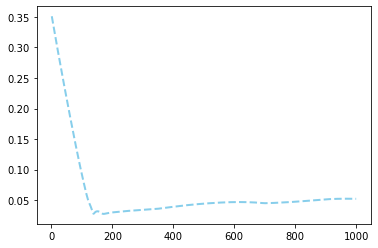

In [235]:
plotLosses(n, 'D')

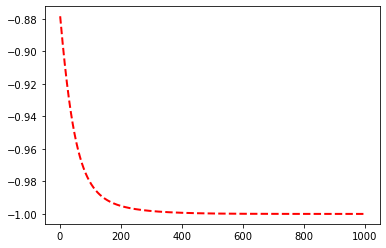

In [214]:
plotLosses(n, 'F')

In [195]:
def loadParams(n, loss_function):
    path = f"./data/params_{loss_function}_{n}.pkl"
    
    with open(path, 'rb') as file:
        params = pickle.load(file)
    
    return params

In [202]:
p = loadParams(2, 'F')

In [203]:
p

array([ 0.43365543, -0.18302868,  0.65015547,  0.08609206, -0.33774013,
        0.78422776,  0.43426452, -0.68614531,  1.06998523,  0.59087558,
        0.5570418 ,  0.96475278,  0.13630521,  0.50148675, -0.12936494,
       -0.53303599])